In [1]:
# Importing the required Libraries

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report


C:\Users\Jeffrey\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape   # Here the Data is of 50000 records, with 32 X 32 Pixel Data [Column Data] and the 3 is for the RGB Band

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]  # Will give the list of the 5 records

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train[5]   # Will give the value of the 5th Record

array([1], dtype=uint8)

In [29]:
# Since it is 2D array and we dont Want 2D Array so we will reshape

y_train = y_train.reshape(-1, )  # In this we can see that as we want all teh 50000 records we will put -1 and as we 
y_test = y_test.reshape(-1, )    # want to 1D array we will leave a blank space

y_train[:5]                      # Now when we check we are able to find that the data has been converted to 1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

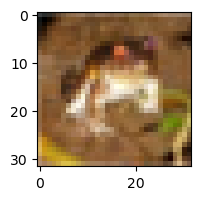

In [11]:
plt.figure(figsize = (15, 2))
plt.imshow(X_train[0])

In [12]:
def plot_sample(X, y, index):           # Here the X is the X data, y is the Y data which has the index of what that img is 
    plt.figure(figsize = (15, 2))       # and index is the index that we want to see in this the index ranges from 0 to 9
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

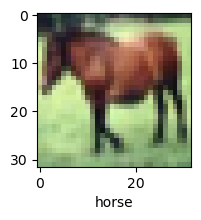

In [13]:
plot_sample(X_train, y_train, 7)

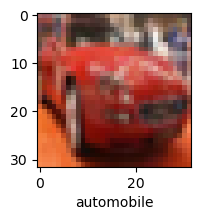

In [14]:
plot_sample(X_train, y_train, 5)

In [15]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
# So as we are dealing with the Color i.e RGB we have to divide the data by 255
# By doing 

X_train = X_train / 255
X_test = X_test / 255

### Building the ANN Network First to see how the model works when using the ANN

In [17]:
# Building the Model

'''ann = Sequential()

ann.add(Flatten(input_shape = (32, 32, 3)))  # Input Layer

ann.add(Dense(3000, activation = 'relu'))    # HN 1
ann.add(Dense(1000, activation = 'relu'))    # HN 2

ann.add(Dense(10, activation = 'softmax'))   # Output Layer  '''


"ann = Sequential()\n\nann.add(Flatten(input_shape = (32, 32, 3)))  # Input Layer\n\nann.add(Dense(3000, activation = 'relu'))    # HN 1\nann.add(Dense(1000, activation = 'relu'))    # HN 2\n\nann.add(Dense(10, activation = 'softmax'))   # Output Layer  "

In [18]:
# Setting the Model Metrics

'''ann.compile(optimizer= 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']) '''

"ann.compile(optimizer= 'adam',\n           loss = 'sparse_categorical_crossentropy',\n           metrics = ['accuracy']) "

In [19]:
# ann.fit(X_train, y_train, epochs = 5)

In [20]:
# loss, precision = ann.evaluate(X_test, y_test)

In [21]:
# y_pred = ann.predict(X_test)

In [22]:
# y_pred_classes = [np.argmax(element) for element in y_pred]

In [23]:
# print('Classification Report: \n', classification_report(y_test, y_pred_classes))

### Building the CNN + ANN Model 

In [24]:
cnn = Sequential()

In [25]:
# CNN Layers ( Which includes Conv + pool)

# 1st is the Input Layer of the CNN Which we can figure out by seeing that we have given the input_shape

# CNN Layer 1 ( Input Layer )
cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# CNN Layer 2 
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# ANN Layers ( Which includes Flatten data and the Hidden layers i.e Dense Layers)

# Flattening the data
cnn.add(Flatten())

# ANN Layer 1 
cnn.add(Dense(64, activation = 'relu'))  # HN 1
cnn.add(Dense(32, activation = 'relu'))  # HN 2

# ANN Output Layer
cnn.add(Dense(10, activation = 'softmax'))



C:\Users\Jeffrey\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Building the Model Metrics

cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3651 - loss: 1.7216
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5879 - loss: 1.1627
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6554 - loss: 0.9912
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6940 - loss: 0.8762
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7120 - loss: 0.8198
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7460 - loss: 0.7352
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7666 - loss: 0.6708
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7816 - loss: 0.6316
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7937 - loss: 0.5835
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8080 - loss: 0.5413


In [28]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7020 - loss: 0.9666


### Seeing what is in the test data and predicting on it

In [31]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [32]:
y_pred[0]                  # As we have used the softmax function we will get 10 values between 0 - 1 

array([5.4213419e-03, 5.6788707e-03, 4.6637491e-03, 9.2687654e-01,
       2.5738075e-03, 4.5273535e-02, 5.4125016e-04, 7.6853909e-04,
       6.4616031e-03, 1.7406975e-03], dtype=float32)

In [33]:
y_pred[1]

array([8.61837249e-03, 6.86354280e-01, 3.40301455e-07, 1.75814066e-08,
       2.48830373e-10, 3.63515718e-10, 1.18258484e-07, 1.03227769e-07,
       2.85131007e-01, 1.98958628e-02], dtype=float32)

In [35]:
np.argmax(y_pred[0])        # argmax basically just finds the max number from the list 

3

In [36]:
np.argmax(y_pred[1])

1

In [37]:
y_pred_classes = [np.argmax(element) for element in y_pred]    # Here we are just running the for loop 

In [39]:
y_pred_classes[:5]

[3, 1, 8, 0, 6]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

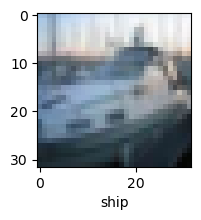

In [46]:
plot_sample(X_test, y_test, 2)

In [47]:
classes[y_pred_classes[2]]

'ship'

In [48]:
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.67      0.54      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.71      0.58      0.64      1000
           5       0.62      0.63      0.62      1000
           6       0.79      0.74      0.77      1000
           7       0.70      0.80      0.75      1000
           8       0.76      0.83      0.79      1000
           9       0.68      0.85      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

